<a href="https://colab.research.google.com/github/tomdeb88/Data_Science_practise/blob/main/Pandas/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Pandas
>Strona biblioteki: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
>Dokumentacja: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
>
>Podstawowa biblioteka do analizy danych w języku Python.
>
>Aby zainstalować bibliotekę Pandas użyj polecenia poniżej:
```
pip install pandas
```
### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)










### <a name='a1'></a> Import Bibliotek

In [55]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.23.5
Pandas: 1.5.3


### <a name='a2'></a> Załadowanie danych

In [56]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2023-11-22 to 2018-11-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


### <a name='a3'></a> Eksploracja danych

In [57]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-11-22,144.57,147.74,144.570,146.71,45700002
2023-11-21,143.91,144.05,141.500,143.90,71225992
2023-11-20,145.13,146.63,144.725,146.13,41978766
2023-11-17,142.66,145.23,142.545,145.18,49678437
2023-11-16,140.91,143.32,139.520,142.83,49653512


In [58]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2023-11-22,144.57,147.74,144.570,146.71,45700002
2023-11-21,143.91,144.05,141.500,143.90,71225992
2023-11-20,145.13,146.63,144.725,146.13,41978766


In [59]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2018-11-30,83.9750,84.8000,83.3250,84.5085,115235220
2018-11-29,83.7495,84.4995,82.6165,83.6785,132264860
2018-11-28,80.6960,84.0725,80.0610,83.8875,169174760
2018-11-27,78.7995,79.8825,77.9005,79.0710,115664540
2018-11-26,76.9500,79.2405,76.2110,79.0665,125154320


In [60]:
df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-10,81.1920,82.8995,79.5435,82.0515,149896160
2018-12-07,85.2535,85.9465,81.2730,81.4565,151522640
2018-12-06,80.7435,85.0525,80.4925,84.9595,175787880
2018-12-04,87.8000,88.5170,83.2500,83.4200,173889100
2018-12-03,88.4730,88.9170,86.5000,88.6180,137243200
2018-11-30,83.9750,84.8000,83.3250,84.5085,115235220
2018-11-29,83.7495,84.4995,82.6165,83.6785,132264860
2018-11-28,80.6960,84.0725,80.0610,83.8875,169174760
2018-11-27,78.7995,79.8825,77.9005,79.0710,115664540


In [61]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [62]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2023-11-22,144.57,147.74,144.570,146.71,45700002
2023-11-21,143.91,144.05,141.500,143.90,71225992
2023-11-20,145.13,146.63,144.725,146.13,41978766
2023-11-17,142.66,145.23,142.545,145.18,49678437
2023-11-16,140.91,143.32,139.520,142.83,49653512


In [63]:
df.describe()

,open,high,low,close,volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,126.324777,127.888829,124.652940,126.288517,7.796912e+07
std,31.861735,32.146880,31.489758,31.774174,3.531114e+07
min,67.300000,69.801500,65.350000,67.198000,1.762674e+07
25%,94.624000,95.694500,93.500000,94.681500,5.443062e+07
50%,124.920000,126.500000,123.190000,124.830000,6.713754e+07
75%,158.338000,159.938000,156.250000,158.100000,9.233112e+07
max,187.200000,188.654000,184.840000,186.570000,3.113457e+08


In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1257.0,1.263248e+02,3.186174e+01,6.730000e+01,9.462400e+01,124.92,1.583380e+02,1.872000e+02
high,1257.0,1.278888e+02,3.214688e+01,6.980150e+01,9.569450e+01,126.50,1.599380e+02,1.886540e+02
low,1257.0,1.246529e+02,3.148976e+01,6.535000e+01,9.350000e+01,123.19,1.562500e+02,1.848400e+02
close,1257.0,1.262885e+02,3.177417e+01,6.719800e+01,9.468150e+01,124.83,1.581000e+02,1.865700e+02
volume,1257.0,7.796912e+07,3.531114e+07,1.762674e+07,5.443062e+07,67137540.00,9.233112e+07,3.113457e+08


### <a name='a4'></a> Selekcja kolumn

In [65]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2023-11-22,144.57,147.74,144.570,146.71,45700002
2023-11-21,143.91,144.05,141.500,143.90,71225992
2023-11-20,145.13,146.63,144.725,146.13,41978766
2023-11-17,142.66,145.23,142.545,145.18,49678437
2023-11-16,140.91,143.32,139.520,142.83,49653512
2023-11-15,147.06,147.29,142.590,143.20,63875720
2023-11-14,145.00,147.26,144.680,145.80,56674551
2023-11-13,142.08,143.23,140.670,142.59,35680570
2023-11-10,140.46,143.65,139.910,143.56,49349937


In [66]:
df['open']

Date
2023-11-22    144.57
2023-11-21    143.91
2023-11-20    145.13
2023-11-17    142.66
2023-11-16    140.91
2023-11-15    147.06
2023-11-14    145.00
2023-11-13    142.08
2023-11-10    140.46
2023-11-09    142.02
Name: open, dtype: float64

In [67]:
df.open

Date
2023-11-22    144.57
2023-11-21    143.91
2023-11-20    145.13
2023-11-17    142.66
2023-11-16    140.91
2023-11-15    147.06
2023-11-14    145.00
2023-11-13    142.08
2023-11-10    140.46
2023-11-09    142.02
Name: open, dtype: float64

In [68]:
df[['open']]

,open
Date,
2023-11-22,144.57
2023-11-21,143.91
2023-11-20,145.13
2023-11-17,142.66
2023-11-16,140.91
2023-11-15,147.06
2023-11-14,145.00
2023-11-13,142.08
2023-11-10,140.46


In [69]:
df[['open', 'close']]

,open,close
Date,,
2023-11-22,144.57,146.71
2023-11-21,143.91,143.90
2023-11-20,145.13,146.13
2023-11-17,142.66,145.18
2023-11-16,140.91,142.83
2023-11-15,147.06,143.20
2023-11-14,145.00,145.80
2023-11-13,142.08,142.59
2023-11-10,140.46,143.56


In [70]:
df.iloc[:, 0]

Date
2023-11-22    144.57
2023-11-21    143.91
2023-11-20    145.13
2023-11-17    142.66
2023-11-16    140.91
2023-11-15    147.06
2023-11-14    145.00
2023-11-13    142.08
2023-11-10    140.46
2023-11-09    142.02
Name: open, dtype: float64

In [71]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2023-11-22,144.57,146.71
2023-11-21,143.91,143.90
2023-11-20,145.13,146.13
2023-11-17,142.66,145.18
2023-11-16,140.91,142.83
2023-11-15,147.06,143.20
2023-11-14,145.00,145.80
2023-11-13,142.08,142.59
2023-11-10,140.46,143.56


In [72]:
df.iloc[:, 3:5]

,close,volume
Date,,
2023-11-22,146.71,45700002
2023-11-21,143.90,71225992
2023-11-20,146.13,41978766
2023-11-17,145.18,49678437
2023-11-16,142.83,49653512
2023-11-15,143.20,63875720
2023-11-14,145.80,56674551
2023-11-13,142.59,35680570
2023-11-10,143.56,49349937


In [73]:
df.iloc[:, -1]

Date
2023-11-22    45700002
2023-11-21    71225992
2023-11-20    41978766
2023-11-17    49678437
2023-11-16    49653512
2023-11-15    63875720
2023-11-14    56674551
2023-11-13    35680570
2023-11-10    49349937
2023-11-09    36235367
Name: volume, dtype: int64

In [74]:
df.iloc[:, [-1]]

,volume
Date,
2023-11-22,45700002
2023-11-21,71225992
2023-11-20,41978766
2023-11-17,49678437
2023-11-16,49653512
2023-11-15,63875720
2023-11-14,56674551
2023-11-13,35680570
2023-11-10,49349937


In [75]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2023-11-22,144.570,146.71,45700002
2023-11-21,141.500,143.90,71225992
2023-11-20,144.725,146.13,41978766
2023-11-17,142.545,145.18,49678437
2023-11-16,139.520,142.83,49653512
2023-11-15,142.590,143.20,63875720
2023-11-14,144.680,145.80,56674551
2023-11-13,140.670,142.59,35680570
2023-11-10,139.910,143.56,49349937


### <a name='a5'></a>  Selekcja wierszy

In [76]:
df

,open,high,low,close,volume
Date,,,,,
2023-11-22,144.57,147.74,144.570,146.71,45700002
2023-11-21,143.91,144.05,141.500,143.90,71225992
2023-11-20,145.13,146.63,144.725,146.13,41978766
2023-11-17,142.66,145.23,142.545,145.18,49678437
2023-11-16,140.91,143.32,139.520,142.83,49653512
2023-11-15,147.06,147.29,142.590,143.20,63875720
2023-11-14,145.00,147.26,144.680,145.80,56674551
2023-11-13,142.08,143.23,140.670,142.59,35680570
2023-11-10,140.46,143.65,139.910,143.56,49349937


In [77]:
df.iloc[0]

open           144.57
high           147.74
low            144.57
close          146.71
volume    45700002.00
Name: 2023-11-22 00:00:00, dtype: float64

In [78]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2023-11-22,144.57,147.74,144.570,146.71,45700002
2023-11-21,143.91,144.05,141.500,143.90,71225992
2023-11-20,145.13,146.63,144.725,146.13,41978766


In [79]:
df

,open,high,low,close,volume
Date,,,,,
2023-11-22,144.57,147.74,144.570,146.71,45700002
2023-11-21,143.91,144.05,141.500,143.90,71225992
2023-11-20,145.13,146.63,144.725,146.13,41978766
2023-11-17,142.66,145.23,142.545,145.18,49678437
2023-11-16,140.91,143.32,139.520,142.83,49653512
2023-11-15,147.06,147.29,142.590,143.20,63875720
2023-11-14,145.00,147.26,144.680,145.80,56674551
2023-11-13,142.08,143.23,140.670,142.59,35680570
2023-11-10,140.46,143.65,139.910,143.56,49349937


In [80]:
df.loc['2019-12-10': '2019-12-02']

<ipython-input-80-db0b9f3805fc>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df.loc['2019-12-10': '2019-12-02']


,open,high,low,close,volume
Date,,,,,


### <a name='a6'></a> Obliczanie nowych kolumn

In [81]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1144 entries, 2023-11-22 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1144 non-null   float64
 1   High    1144 non-null   float64
 2   Low     1144 non-null   float64
 3   Close   1144 non-null   float64
 4   Volume  1144 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.6 KB


In [82]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-11-22,55.10,55.820,54.96,55.37,18467671
2023-11-21,54.23,55.080,53.89,54.85,34115507
2023-11-20,53.83,55.355,53.76,54.75,28529194
2023-11-17,54.13,54.510,54.01,54.44,16122436
2023-11-16,53.50,54.510,53.15,54.42,20810849


In [83]:
df.describe()

,Open,High,Low,Close,Volume
count,1144.000000,1144.000000,1144.000000,1144.000000,1.144000e+03
mean,37.884657,38.644273,37.094531,37.878741,2.496852e+07
std,9.401354,9.477357,9.285459,9.371417,1.596329e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,30.672500,31.298750,30.117500,30.695000,1.573837e+07
50%,36.190000,37.015000,35.270000,36.285000,2.125258e+07
75%,44.720000,45.394675,43.977500,44.612500,2.950098e+07
max,63.250000,64.050000,60.800000,63.180000,1.863225e+08


In [84]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2023-11-22,55.10,55.820,54.96,55.37,18467671
2023-11-21,54.23,55.080,53.89,54.85,34115507
2023-11-20,53.83,55.355,53.76,54.75,28529194


In [85]:
df['Average'] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2023-11-22,55.10,55.820,54.96,55.37,18467671,55.235
2023-11-21,54.23,55.080,53.89,54.85,34115507,54.540
2023-11-20,53.83,55.355,53.76,54.75,28529194,54.290
2023-11-17,54.13,54.510,54.01,54.44,16122436,54.285
2023-11-16,53.50,54.510,53.15,54.42,20810849,53.960


In [86]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [87]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [88]:
df['Daily_Change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [89]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [90]:
df.Daily_Change.min()

-0.21628767847699626

In [91]:
df.Daily_Change.max()

0.3825910931174088

<Axes: >

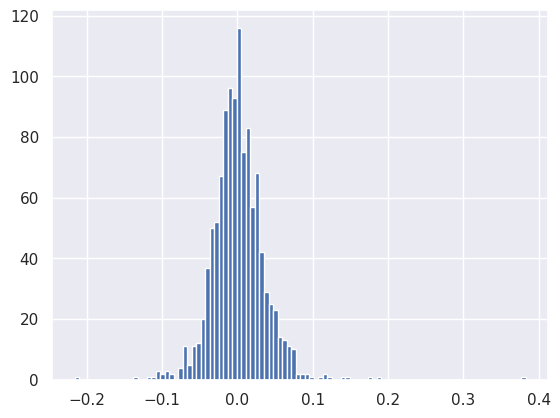

In [92]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

<Axes: xlabel='Date'>

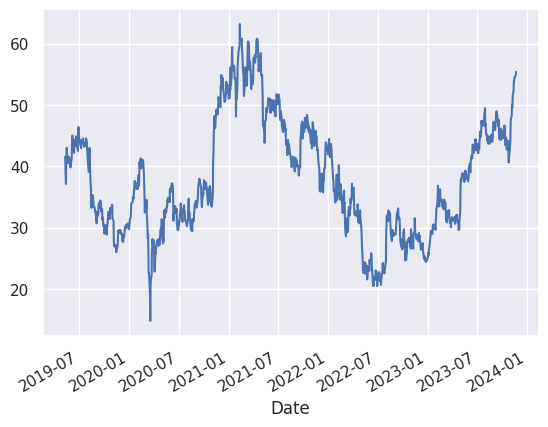

In [93]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [94]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.25,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2023-11-16,53.50,54.510,53.15,54.42,20810849,53.960,53.76,0.012277
2023-11-17,54.13,54.510,54.01,54.44,16122436,54.285,54.42,0.000368
2023-11-20,53.83,55.355,53.76,54.75,28529194,54.290,54.44,0.005694


In [95]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.960,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.510,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.570,39.41,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2023-11-16,53.50,54.510,53.15,54.42,20810849,53.960,53.76,0.012277
2023-11-17,54.13,54.510,54.01,54.44,16122436,54.285,54.42,0.000368
2023-11-20,53.83,55.355,53.76,54.75,28529194,54.290,54.44,0.005694


In [96]:
df_positive.Daily_Change.mean()

0.02637847203212944

In [97]:
 df_negative = df[df.Daily_Change < 0]
 df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.24,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.29,41.270,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.68,39.460,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.24,41.250,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.28,40.500,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2023-10-19,43.02,43.27,42.185,42.72,16089978,42.870,43.00,-0.006512
2023-10-25,43.30,43.49,42.065,42.35,16495882,42.825,44.19,-0.041638
2023-10-26,42.14,42.30,40.090,40.62,23465460,41.380,42.35,-0.040850


In [98]:
 df_negative.Daily_Change.mean()

-0.023913303261476573

In [99]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2023-11-16    False
2023-11-17    False
2023-11-20    False
2023-11-21    False
2023-11-22    False
Length: 1144, dtype: bool

In [100]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780
2022-11-30,27.80,29.14,27.64,29.14,18177028,28.470,27.76,0.049712


In [101]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-0.017112
2023-01-05,25.73,26.01,25.55,25.55,9942038,25.640,25.91,-0.013894
2023-05-16,37.93,38.15,37.44,37.44,21836864,37.685,38.14,-0.018353
2023-05-30,38.73,39.06,37.56,37.56,18143192,38.145,38.45,-0.023147


In [102]:
df.index > '2019-11-01'

array([False, False, False, ...,  True,  True,  True])

In [103]:
df[df.index > '2019-11-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-04,31.45,31.750,30.120,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.300,27.970,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.550,25.580,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.420,26.450,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.620,26.915,27.01,45263118,27.245,27.38,-0.013514
...,...,...,...,...,...,...,...,...
2023-11-16,53.50,54.510,53.150,54.42,20810849,53.960,53.76,0.012277
2023-11-17,54.13,54.510,54.010,54.44,16122436,54.285,54.42,0.000368
2023-11-20,53.83,55.355,53.760,54.75,28529194,54.290,54.44,0.005694


In [104]:
df[(df.index >= '2019-11-01') & (df.index < '2019-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,31.50,-0.004127
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,27.38,-0.013514
2019-11-11,27.03,27.21,26.2300,27.14,41445732,27.085,27.01,0.004813
2019-11-12,27.38,27.66,26.6600,26.70,37095389,27.040,27.14,-0.016212
2019-11-13,26.47,26.82,26.1400,26.71,34512663,26.590,26.70,0.000375


In [105]:
df[(df.index == '2019-11-01') | (df.index == '2019-11-07')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.41,31.50,-0.004127
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.09,26.94,0.016333


In [106]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.25,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2023-11-16,53.50,54.510,53.15,54.42,20810849,53.960,53.76,0.012277
2023-11-17,54.13,54.510,54.01,54.44,16122436,54.285,54.42,0.000368
2023-11-20,53.83,55.355,53.76,54.75,28529194,54.290,54.44,0.005694


In [107]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2023-05-24,38.05,38.660,37.770,37.96,22074721,38.005,38.66,-0.018107
2023-05-25,38.48,38.585,37.525,37.95,18634222,38.215,37.96,-0.000263
2023-05-26,38.24,38.760,38.220,38.45,14438769,38.345,37.95,0.013175


In [108]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-07-01,46.980,47.0400,44.0600,44.27,17739998,45.6250,46.38,-0.045494
2019-08-01,42.140,42.5355,41.0000,41.31,7349740,41.7250,42.14,-0.019696
2019-10-01,30.370,30.5100,28.6500,29.15,13448055,29.7600,30.47,-0.043321
2019-11-01,31.450,31.7000,30.7412,31.37,10460430,31.4100,31.50,-0.004127
2020-04-01,26.500,26.7670,24.8101,25.42,38538381,25.9600,27.92,-0.089542
2020-05-01,29.130,29.7200,28.3250,28.39,19290192,28.7600,30.27,-0.062108
2020-06-01,35.640,36.3900,35.1600,35.82,21893806,35.7300,36.32,-0.013767
2020-07-01,30.960,31.2650,30.1622,30.43,13611544,30.6950,31.08,-0.020914
2020-09-01,33.450,34.5100,33.1450,34.30,16026170,33.8750,33.63,0.019923
